<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/Hadamard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Hadamard Transform

Hadamard on a random matrix

In [1]:
# using hadamard function from scipy library
from scipy.linalg import hadamard
import numpy as np
import random

In [3]:
# Hadamard matrix of order N
N= int(input("Enter matrix order: "))
print(hadamard(N))

Enter matrix order: 4
[[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]


In [ ]:
#Implementing 2D Hadamard on a given NxN matrix
mat= np.random.randint(9, size= (N,N))
H= hadamard(N)
mat_had= np.dot(H,mat)#using np.dot function for matrix multiplication
mat_had= np.dot(mat_had,H)


In [ ]:
# Inverse Hadamard transform
mat_new= np.dot(H,mat_had)
mat_new=np.dot(mat_new,H)
mat_new=mat_new//(N*N)

In [ ]:
print(mat)
print("\n")
print(H)
print("\n")
print(mat_had)
print("\n")
print(mat_new)

[[5 4 3 8 6 2 3 0]
 [0 5 1 8 7 6 1 6]
 [2 2 8 3 3 0 4 3]
 [3 4 4 0 4 5 5 3]
 [3 7 2 0 0 0 0 2]
 [0 0 3 5 4 5 6 3]
 [7 6 8 6 8 5 5 7]
 [0 6 2 1 7 8 4 0]]
[[ 1  1  1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1  1 -1]
 [ 1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1]
 [ 1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]
[[238  -2  10 -10  -6 -26 -26 -18]
 [  6  26 -14  18  58  10  22 -14]
 [-28 -32  -4  28  12 -20  -4  16]
 [-36   4  44 -24  12  -8  20   4]
 [ -2   2 -14  18  10  -6 -10   2]
 [-18  22 -14 -10  -6 -18 -26  22]
 [ 52 -20  28  24  -4 -24 -28   4]
 [ 36  24 -12  12  -4   4  -4  24]]
[[5 4 3 8 6 2 3 0]
 [0 5 1 8 7 6 1 6]
 [2 2 8 3 3 0 4 3]
 [3 4 4 0 4 5 5 3]
 [3 7 2 0 0 0 0 2]
 [0 0 3 5 4 5 6 3]
 [7 6 8 6 8 5 5 7]
 [0 6 2 1 7 8 4 0]]


Hadamard on Image

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.linalg import hadamard

In [18]:
#hadamard transform function
# F= HfH
def had2(f):
  H=hadamard(8)
  F= np.dot(np.dot(H,f),H)
  return(F)



In [19]:
#Inverse Hadamard
# f= (HFH)/N*N
def had2inv(F):
  H=hadamard(8)
  f= np.dot(np.dot(H,F),H)
  f=f//64
  return(f)

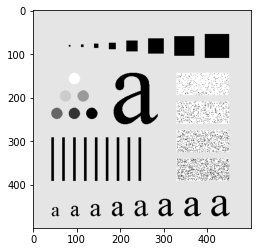

In [20]:
img = cv2.imread('/Test.tif',0)  # Read the image
m,n= img.shape #Find and store size of image in m,n
plt.imshow(img, cmap="gray")

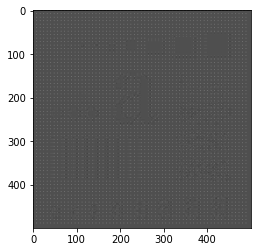

In [21]:
# Hadamard Transform on input image by dividing image in 8X8 blocks
N= 8 #Size of the block
imghad = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imghad[row*N:(row+1)*N,col*N:(col+1)*N]= had2(img[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imghad, cmap="gray")

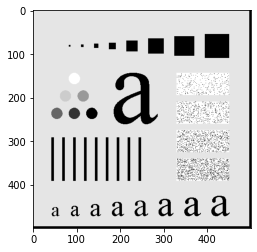

In [22]:
#Inverse Hadamard transform
N=8

imgnew = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imgnew[row*N:(row+1)*N,col*N:(col+1)*N]= had2inv(imghad[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgnew, cmap="gray")